In [1]:
import sys
sys.path.insert(0, '../../')
import math
import numpy as np
import matplotlib.pyplot as plt
from gasp import ssfp, responses, simulation, dataset

In [2]:
# Experiment parameters
TR = 5e-3
alpha = [np.deg2rad(20), np.deg2rad(30), np.deg2rad(90)]
TE = TR / 2.0
BetaMax = 2 * np.pi
beta = np.linspace(-BetaMax, BetaMax, 256)
f = beta / TR / (2 * np.pi)
npcs = 1
pcs = np.linspace(0, 2*np.pi, npcs, endpoint=False)

# Fat
T1, T2 = 0.25, .07
MF0 = ssfp.ssfp(T1, T2, TR, TE, alpha[0], pcs, f0=f)
MF1 = ssfp.ssfp(T1, T2, TR, TE, alpha[1], pcs, f0=f)
MF2 = ssfp.ssfp(T1, T2, TR, TE, alpha[2], pcs, f0=f)

# Muscle
T1, T2 = 0.9, .05
MM0 = ssfp.ssfp(T1, T2, TR, TE, alpha[0], pcs, f0=f)
MM1 = ssfp.ssfp(T1, T2, TR, TE, alpha[1], pcs, f0=f)
MM2 = ssfp.ssfp(T1, T2, TR, TE, alpha[2], pcs, f0=f)

# Multiple TRs
T1, T2 = 0.9, .05
TR = 5e-3
TE = TR / 2.0
MTR0 = ssfp.ssfp(T1, T2, TR, TE, alpha[2], pcs, f0=f)
TR = 10e-3
TE = TR / 2.0
MTR1 = ssfp.ssfp(T1, T2, TR, TE, alpha[2], pcs, f0=f)
TR = 20e-3
TE = TR / 2.0
MTR2 = ssfp.ssfp(T1, T2, TR, TE, alpha[2], pcs, f0=f)



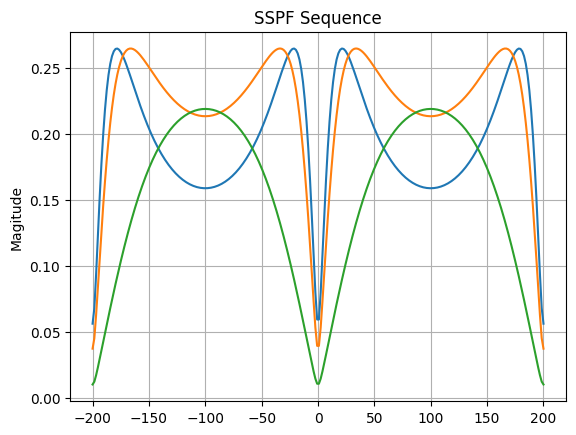

In [3]:
plt.plot(f, np.absolute(MF0))
plt.plot(f, np.absolute(MF1))
plt.plot(f, np.absolute(MF2))
plt.ylabel('Magitude')
plt.title('SSPF Sequence')
plt.grid(True)

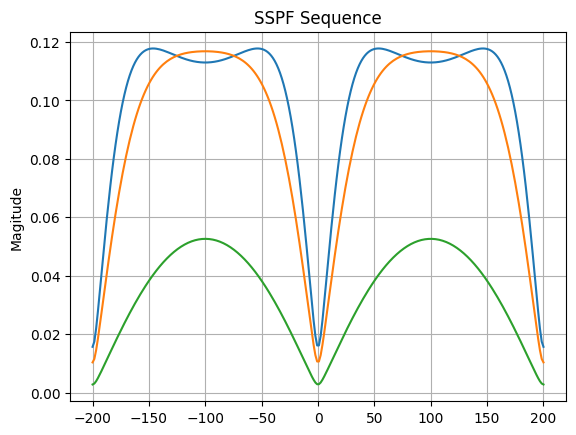

In [4]:
plt.plot(f, np.absolute(MM0))
plt.plot(f, np.absolute(MM1))
plt.plot(f, np.absolute(MM2))
plt.ylabel('Magitude')
plt.title('SSPF Sequence')
plt.grid(True)

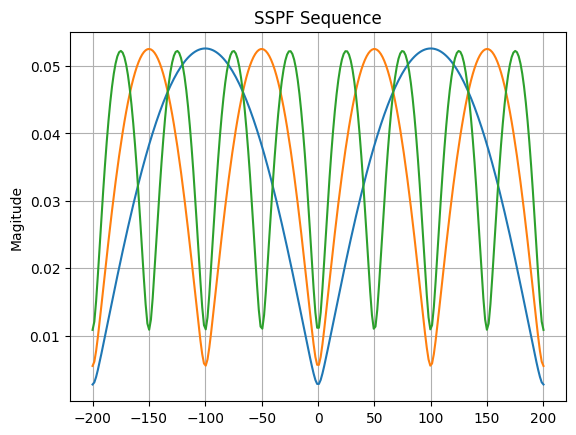

In [5]:
plt.plot(f, np.absolute(MTR0))
plt.plot(f, np.absolute(MTR1))
plt.plot(f, np.absolute(MTR2))
plt.ylabel('Magitude')
plt.title('SSPF Sequence')
plt.grid(True)

(256, 256, 1, 16, 3)


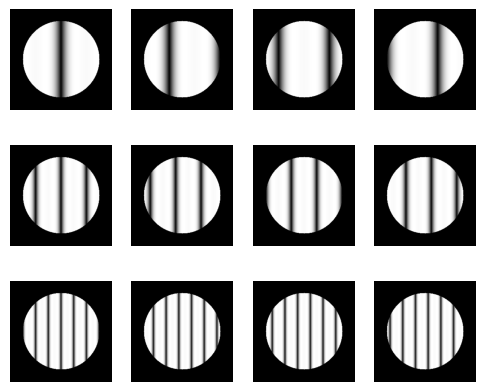

In [6]:
width = 256
height = 256
npcs = 16
TRs = [5e-3, 10e-3, 20e-3]
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
M = simulation.simulate_ssfp(npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
#simulation.view_gasp_input(M)
print(M.shape)

def plot_training_data(M, shift = 0):
    _ = np.abs(np.sqrt(np.sum(np.abs(M)**2, axis=2)))
    
    f = plt.figure(figsize=(6,5))
    ax = f.add_subplot(3,4,1)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,0+shift,0]), cmap='gray')
    ax = f.add_subplot(3,4,2)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,4+shift,0]), cmap='gray')
    ax = f.add_subplot(3,4,3)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,8+shift,0]), cmap='gray')
    ax = f.add_subplot(3,4,4)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,12+shift,0]), cmap='gray')

    ax = f.add_subplot(3,4,5)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,0+shift,1]), cmap='gray')
    ax = f.add_subplot(3,4,6)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,4+shift,1]), cmap='gray')
    ax = f.add_subplot(3,4,7)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,8+shift,1]), cmap='gray')
    ax = f.add_subplot(3,4,8)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,12+shift,1]), cmap='gray')

    ax = f.add_subplot(3,4,9)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,0+shift,2]), cmap='gray')
    ax = f.add_subplot(3,4,10)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,4+shift,2]), cmap='gray')
    ax = f.add_subplot(3,4,11)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,8+shift,2]), cmap='gray')
    ax = f.add_subplot(3,4,12)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,12+shift,2]), cmap='gray')

def plot_training_data2(M, pc, tr):
    _ = np.abs(np.sqrt(np.sum(np.abs(M)**2, axis=2)))
    print(_.shape)
    f = plt.figure(figsize=(6,5))
    ax = f.add_subplot(1,1,1)
    ax.axis('off')
    ax.imshow(np.abs(_[:,:,pc,tr]), cmap='gray')

plot_training_data(M)


(256, 256, 16, 3)


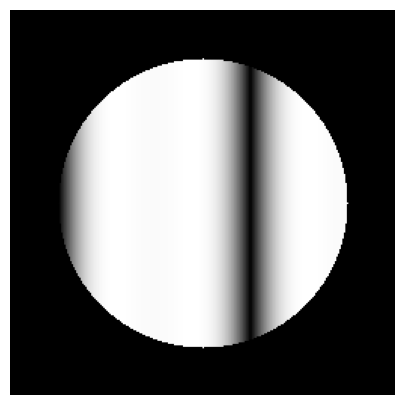

In [7]:
plot_training_data2(M,12,0)

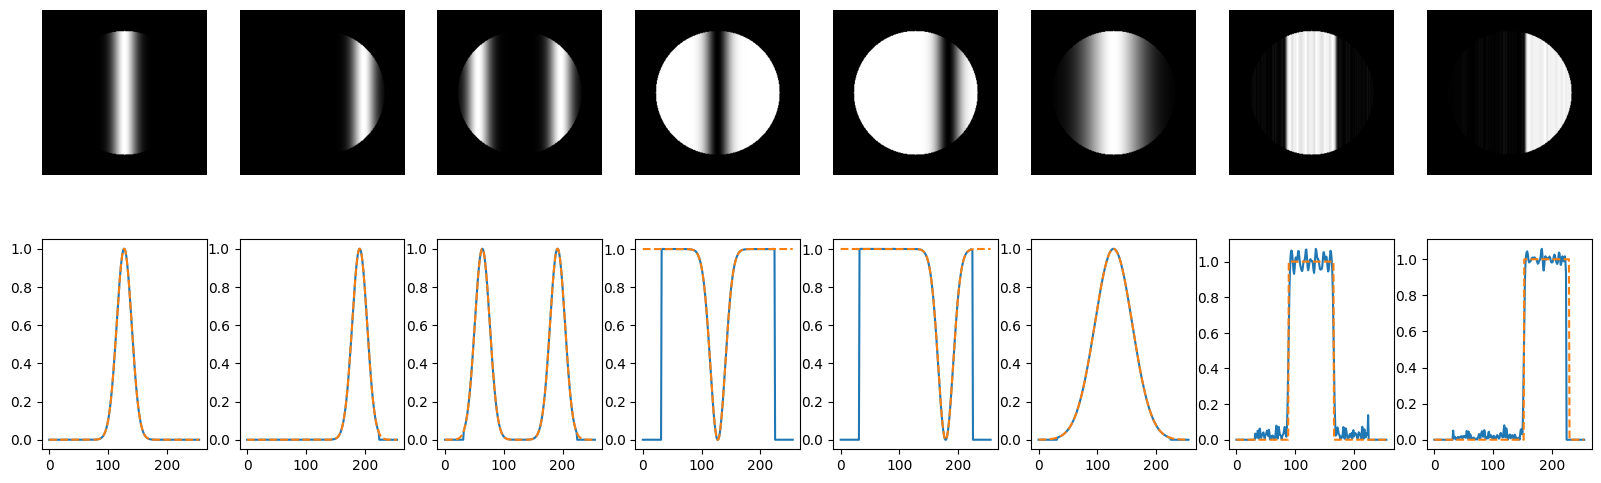

In [8]:
D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25) + responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.2))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.25))

G = []
A = []
for d in D:
    Ic, M, An = simulation.simulate_gasp(d, npcs=npcs, TRs=TRs, alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

simulation.view_gasp_comparison(G, D)

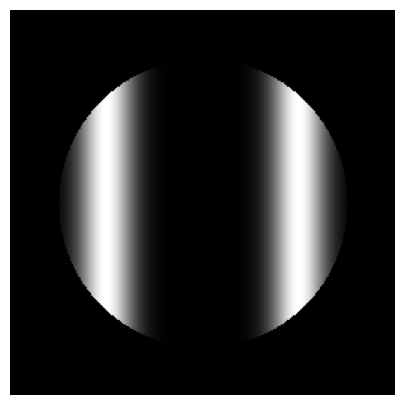

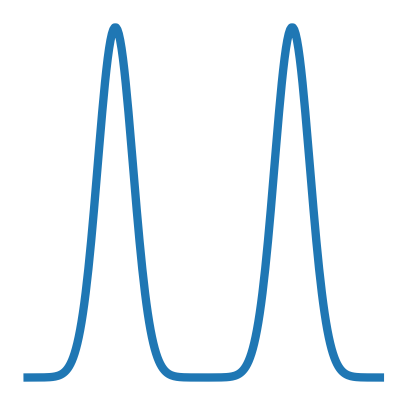

In [9]:
M = G[2]
f = plt.figure(figsize=(6,5))
ax = f.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(np.abs(np.abs(M)), cmap='gray')
plt.show()

_D = D[2]
f = plt.figure(figsize=(5,5))
ax = f.add_subplot(1,1,1)
ax.axis('off')
ax.plot(np.abs(_D), linewidth=6)
plt.show()


Downloading...
From (uriginal): https://drive.google.com/uc?id=11szQZR8MPmT09zaM-lCSc4nUlNC4E-el
From (redirected): https://drive.google.com/uc?id=11szQZR8MPmT09zaM-lCSc4nUlNC4E-el&confirm=t&uuid=cf3e6b4a-dc9d-46f3-8c80-d8c7754d08d5
To: /Users/michael/projects/imperial/GASP/notebooks/publications/data/20231106_GASP_PHANTOM.zip
100%|██████████| 1.24G/1.24G [01:37<00:00, 12.7MB/s]


Download complete.
Extracting files ...
Extract complete.
Data located at: $/Users/michael/projects/imperial/GASP/notebooks/publications/data/20231106_GASP_PHANTOM
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


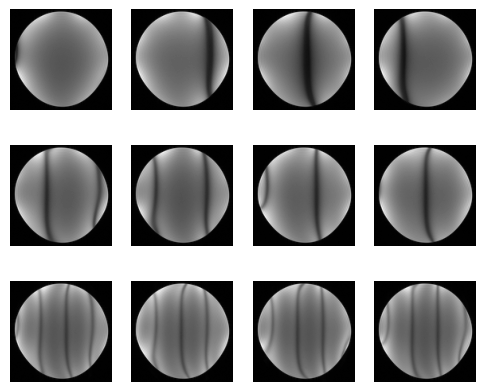

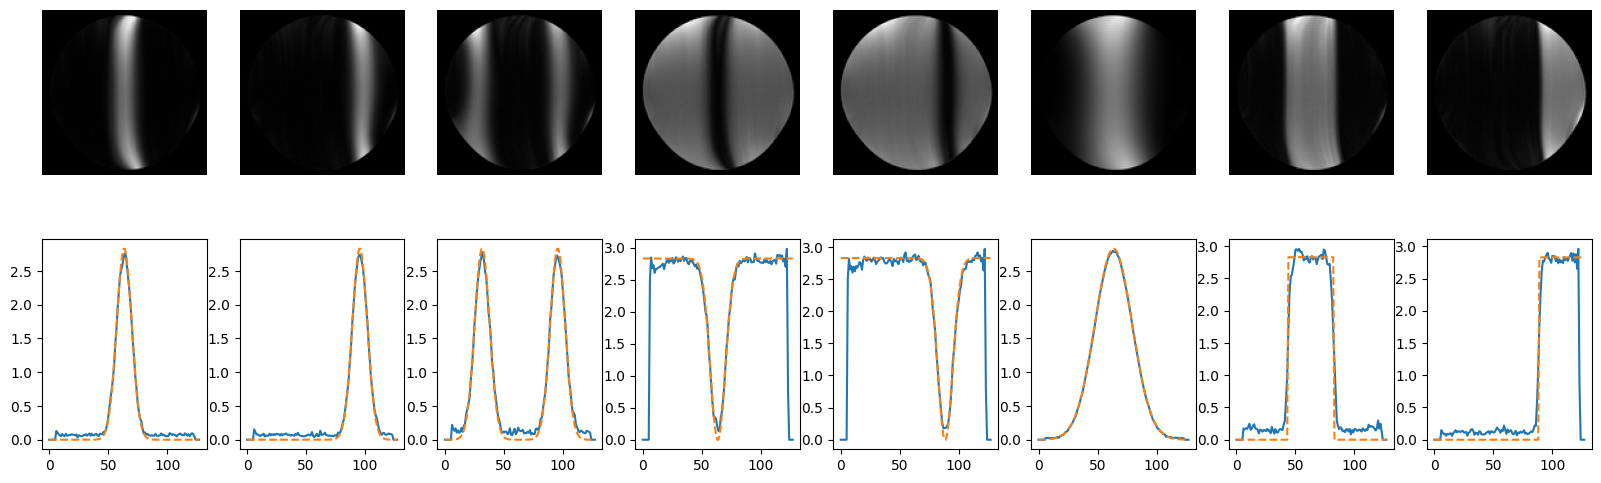

In [10]:
M = dataset.load_dataset7a()
M = M[64:192, 64:192, : ,: ,:]
print(M.shape)
width = M.shape[1]

D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25) + responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.2))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.35))

G = []
A = []
for d in D:
    Ic, An = simulation.train_gasp(M, d, clines=16)    
    G.append(Ic)
    A.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

plot_training_data(M,2)
simulation.view_gasp_comparison(G, D)

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


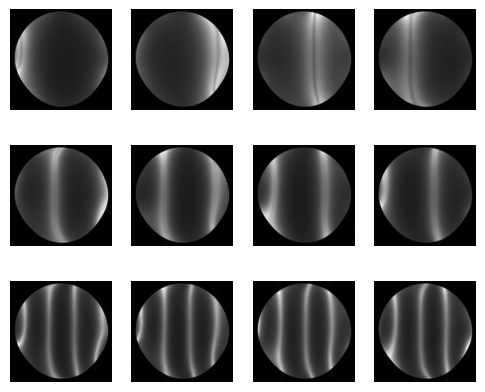

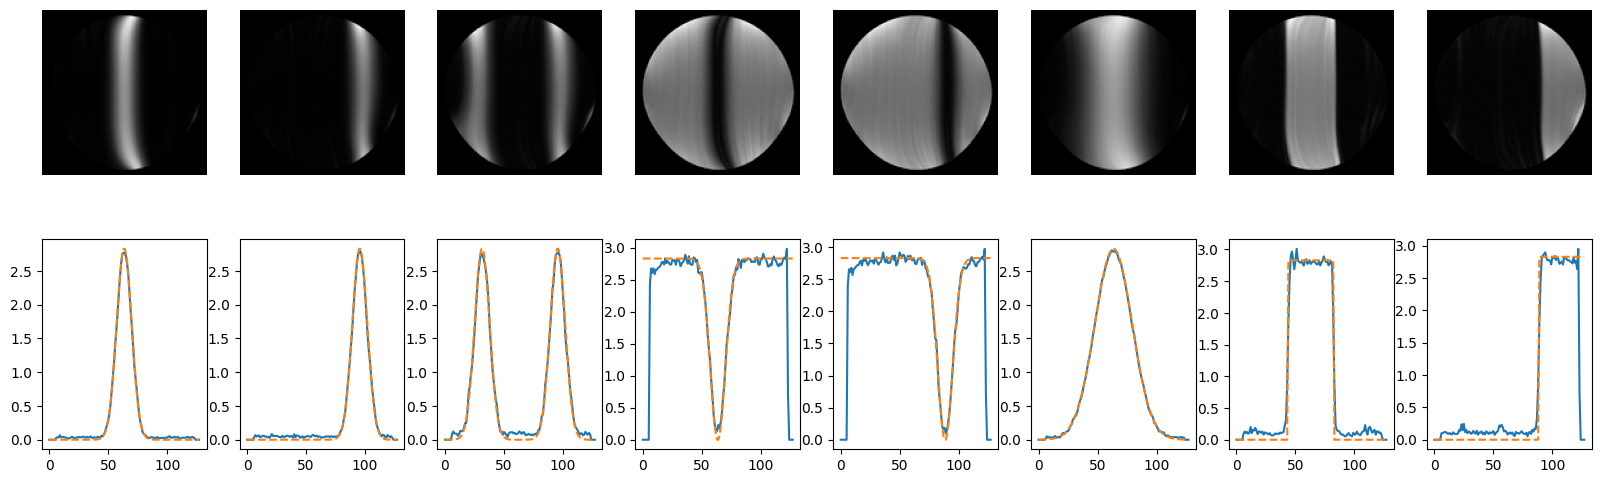

In [11]:
M = dataset.load_dataset7b()
M = M[64:192, 64:192, : ,: ,:]
width = M.shape[1]

D = []
D.append(responses.gaussian(width, bw=0.2, shift=0))
D.append(responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.gaussian(width, bw=0.2, shift=-0.25) + responses.gaussian(width, bw=0.2, shift=0.25))
D.append(responses.notch(width, bw=0.2, shift=0))
D.append(responses.notch(width, bw=0.2, shift=0.2))
D.append(responses.gaussian(width, bw=0.5, shift=0))
D.append(responses.square(width, bw=0.3, shift=0))
D.append(responses.square(width, bw=0.3, shift=0.35))

G = []
A = []
for d in D:
    Ic, An = simulation.train_gasp(M, d, clines=16)    
    G.append(Ic)
    A.append(An)

for i in range(len(D)):
    D[i] = D[i] * math.sqrt(8)

plot_training_data(M,2)
simulation.view_gasp_comparison(G, D)

In [12]:
def subsample_data(M):
    return M[:,:,:,::1,:]

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


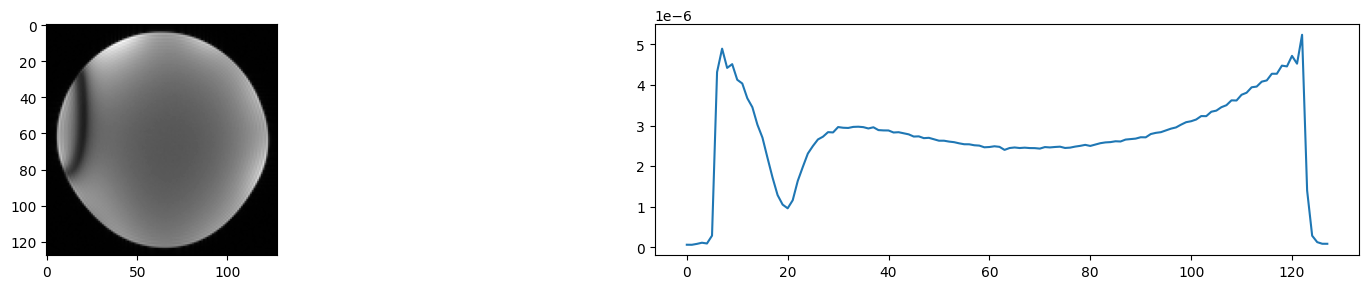

In [13]:
M90 = dataset.load_dataset7a()
M90 = M90[64:192, 64:192, : ,: ,:]
M90 = subsample_data(M90)
print(M90.shape)
simulation.view_gasp_input(M90, [0,0])

Data: 20231106_GASP_PHANTOM data exists
pymapVBVD version 0.5.6
Software version: VB
Scan 1/1, read all mdhs:   0%|          | 0.00/265M [00:00<?, ?B/s]

pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


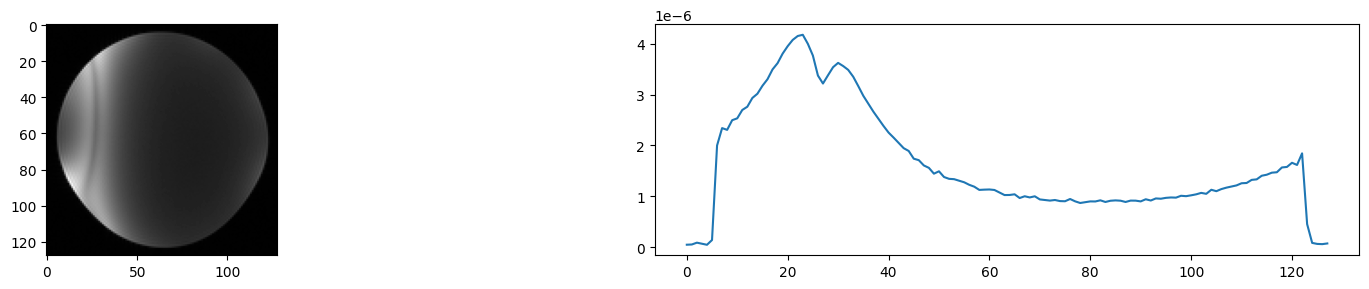

In [14]:
M20 = dataset.load_dataset7b()
M20 = M20[64:192, 64:192, : ,: ,:]
M20 = subsample_data(M20)
M20.shape 
simulation.view_gasp_input(M20, [0,0])

In [15]:
M_knee_90 = dataset.load_dataset8a()
M_knee_90 = M_knee_90[64:192, 64:192, : ,: ,:]
M_knee_90 = subsample_data(M_knee_90)
print(M_knee_90.shape)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1pbn2gsxe-PjvW9vSIE6pnfbCUVWrUGbe
From (redirected): https://drive.google.com/uc?id=1pbn2gsxe-PjvW9vSIE6pnfbCUVWrUGbe&confirm=t&uuid=713a9b83-9d50-481d-a791-3603e1d1c7dc
To: /Users/michael/projects/imperial/GASP/notebooks/publications/data/20231106_GASP_KNEE.zip
100%|██████████| 611M/611M [00:49<00:00, 12.5MB/s] 


Download complete.
Extracting files ...
Extract complete.
Data located at: $/Users/michael/projects/imperial/GASP/notebooks/publications/data/20231106_GASP_KNEE
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


In [16]:
M_knee_20 = dataset.load_dataset8b()
M_knee_20 = M_knee_20[64:192, 64:192, : ,: ,:]
M_knee_20 = subsample_data(M_knee_20)
print(M_knee_20.shape)

Data: 20231106_GASP_KNEE data exists
pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


pymapVBVD version 0.5.6
Software version: VB


(128, 128, 8, 16, 3)


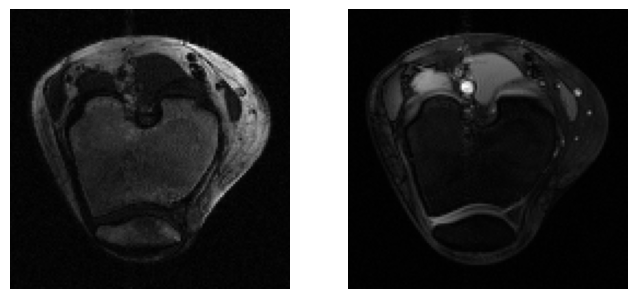

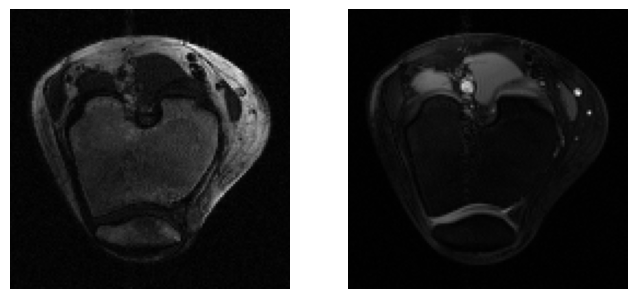

In [17]:
def waterfat_separation(D0_bw = 0.3, D0_shift = -0.3,
    M0_train = M20, M0_data = M_knee_20, D1_bw = 0.3,
    D1_shift = 0.15, M1_train = M20, M1_data = M_knee_20):
    width = 128
    D0 = responses.gaussian(width, bw=D0_bw, shift=D0_shift) 
    D1 = responses.gaussian(width, bw=D1_bw, shift=D1_shift)
    G0, A0 = simulation.train_gasp(M0_train, D0, clines=16)    
    G1, A1 = simulation.train_gasp(M1_train, D1, clines=16)    

    def evaluate_gasp(M, A):
        Ic = []
        for cc in range(M.shape[2]):
            Mc = M[:,:,cc,:,:]
            Mc = np.reshape(Mc,(Mc.shape[0], Mc.shape[0], -1))
            _I = simulation.evaluate_gasp(Mc, A[cc])
            Ic.append(_I)
        Ic = np.array(Ic)
        Ic = np.sqrt(np.sum(np.abs(Ic)**2, axis=0))
        return Ic

    results0 = evaluate_gasp(M0_data, A0)
    results1 = evaluate_gasp(M1_data, A1)

    f = plt.figure(figsize=(8,8))
    ax = f.add_subplot(2, 2, 1)
    ax2 = f.add_subplot(2, 2, 2)
    ax.imshow(results0, cmap='gray')
    ax.axis('off')
    ax2.imshow(results1, cmap='gray')
    ax2.axis('off')
    plt.show()

waterfat_separation(D0_bw = 0.3, D0_shift = -0.3, 
                    M0_train = M20, M0_data = M_knee_20,
                    D1_bw = 0.3, D1_shift = 0.15,
                    M1_train = M20, M1_data = M_knee_20)

waterfat_separation(D0_bw = 0.3, D0_shift = -0.3, 
                    M0_train = M20, M0_data = M_knee_20,
                    D1_bw = 0.3, D1_shift = 0.1,
                    M1_train = M20, M1_data = M_knee_20)

In [18]:
def view_gasp_comparison(G, D, ylim = 1):
    G = np.abs(G)
    length = len(G)

    f = plt.figure(figsize=(20,6))
    for i in range(length):
        ax = f.add_subplot(2, 8, i+1)
        ax2 = f.add_subplot(2, 8, 8 + i+1)

        g = G[i]
        d = D[i]
        ax.imshow(g, cmap='gray')
        ax.axis('off')
        ax2.plot(np.abs(g[int(g.shape[0]/2), :]), label='Simulated Profile')
        ax2.plot(d, '--', label='Desired Profile')
        ax2.set_ylim([0, ylim])
        if i != 0:
            ax2.yaxis.set_visible(False) 

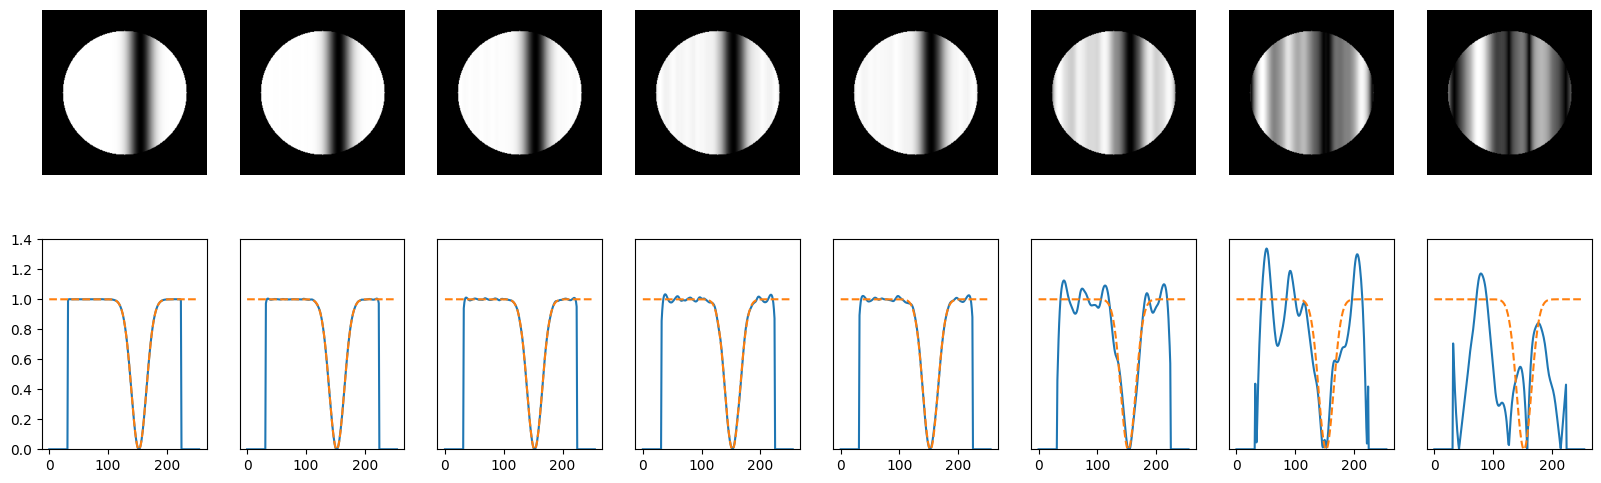

In [19]:
width = 256
height = 256
npcs = 16
alpha = np.deg2rad(60)
gradient = 2 * np.pi
phantom_type = 'circle'
D = responses.notch(width, bw=0.2, shift=0.1)

P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':16, 'TRs':[5e-3, 10e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3] },
     { 'npcs':16, 'TRs':[5e-3] },
     { 'npcs':8, 'TRs':[5e-3] }]

P = [{ 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':14, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':12, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':10, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':8, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':6, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':4, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'npcs':2, 'TRs':[5e-3, 10e-3, 20e-3] }]

G = []
A = []
for p in P:
    M = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    Ic, M, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)
    G.append(Ic)
    A.append(An)

D = [D, D, D, D, D, D, D, D]
view_gasp_comparison(G, D, ylim=1.4)

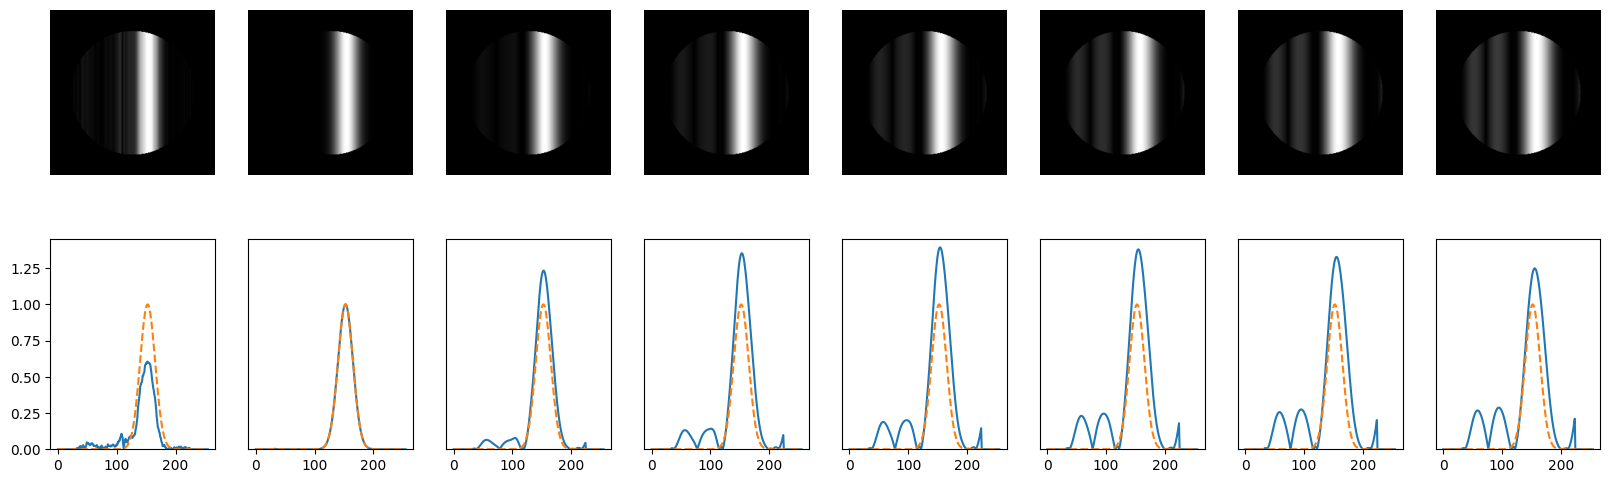

In [20]:
width = 256
height = 256
npcs = 16
gradient = 2 * np.pi
phantom_type = 'circle'
D = responses.gaussian(width, bw=0.2, shift=0.1)

alpha = 30
da = [-20, -10, -0, 10, 20, 30, 40, 50]

alpha = 20
da = [-10,0,10,20,30,40,50,60]

P = [{ 'alpha': np.deg2rad(alpha+da[0]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[1]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[2]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[3]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[4]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[5]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[6]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] },
     { 'alpha': np.deg2rad(alpha+da[7]), 'npcs':16, 'TRs':[5e-3, 10e-3, 20e-3] }]
alpha = np.deg2rad(alpha)

G = []
A = []
for p in P:
    _, __, An = simulation.simulate_gasp(D, npcs=p['npcs'], TRs=p['TRs'], alpha = alpha, gradient = gradient, phantom_type=phantom_type)

    Mdata = simulation.simulate_ssfp(width=width, height=height, npcs=p['npcs'], TRs=p['TRs'], alpha = p['alpha'], gradient = gradient, phantom_type=phantom_type)
    Mdata = np.reshape(Mdata,(Mdata.shape[0], Mdata.shape[0], -1))
    Ic = simulation.evaluate_gasp(Mdata, An[0])
    G.append(Ic)
   

D = [D, D, D, D, D, D, D, D]
view_gasp_comparison(G, D, ylim = 1.45)